This code imports essential Python libraries for data handling, machine learning, and visualization.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import kagglehub

Download and read dataset from KaggleHub, and Print Intial few rows

In [3]:

path = kagglehub.dataset_download("juhibhojani/house-price")
print("Path to dataset files:", path)

100%|██████████| 6.61M/6.61M [00:00<00:00, 40.6MB/s]

Extracting files...


Path to dataset files: /home/sas/.cache/kagglehub/datasets/juhibhojani/house-price/versions/1


In [4]:
# Load the dataset (assume the main CSV file is 'train.csv')
df = pd.read_csv(f"/home/sas/.cache/kagglehub/datasets/juhibhojani/house-price/versions/1/house_prices.csv")
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [5]:
# Display initial shape
print("Initial shape:", df.shape)

Initial shape: (187531, 21)


In [6]:
# Show all column names
print(df.columns.tolist())

['Index', 'Title', 'Description', 'Amount(in rupees)', 'Price (in rupees)', 'location', 'Carpet Area', 'Status', 'Floor', 'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society', 'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area', 'Dimensions', 'Plot Area']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [8]:
int_features=df.select_dtypes(include=["int64"]).columns
int_features

Index(['Index'], dtype='object')

In [9]:
float_features=df.select_dtypes(include=["float64"]).columns
float_features.tolist()

['Price (in rupees)', 'Dimensions', 'Plot Area']

In [10]:
cat_features=df.select_dtypes(include=["object"]).columns
cat_features.tolist()

['Title',
 'Description',
 'Amount(in rupees)',
 'location',
 'Carpet Area',
 'Status',
 'Floor',
 'Transaction',
 'Furnishing',
 'facing',
 'overlooking',
 'Society',
 'Bathroom',
 'Balcony',
 'Car Parking',
 'Ownership',
 'Super Area']

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,187531.0,93765.000000,54135.681003,0.0,46882.5,93765.0,140647.5,187530.0
Price (in rupees),169866.0,7583.771885,27241.705819,0.0,4297.0,6034.0,9450.0,6700000.0
Dimensions,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plot Area,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.describe().shape

(8, 4)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

This code generates a heatmap showing the distribution of missing values across the DataFrame, with a figure size of 17x9 inches

<Axes: >

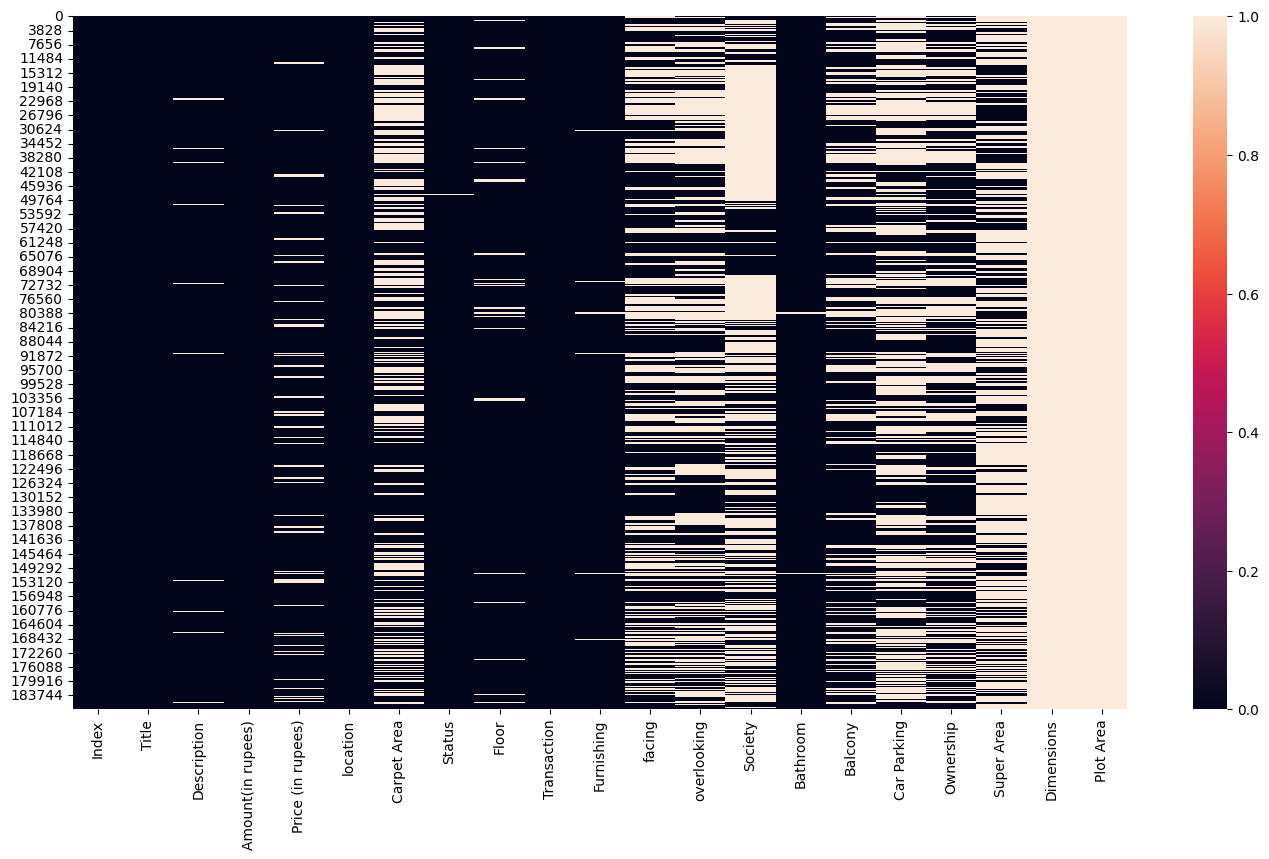

In [15]:
plt.figure(figsize=(17,9))
sns.heatmap(df.isnull())

In [16]:
df.isnull().sum()

Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64

In [17]:
null_percent=df.isnull().sum()/df.shape[0]*100
null_percent

Index                  0.000000
Title                  0.000000
Description            1.612000
Amount(in rupees)      0.000000
Price (in rupees)      9.419776
location               0.000000
Carpet Area           43.018488
Status                 0.327946
Floor                  3.773776
Transaction            0.044259
Furnishing             1.544811
facing                37.451408
overlooking           43.425354
Society               58.485264
Bathroom               0.441527
Balcony               26.094352
Car Parking           55.114621
Ownership             34.936624
Super Area            57.422506
Dimensions           100.000000
Plot Area            100.000000
dtype: float64

In [18]:
# set index as Index column
df1=df.set_index("Index")

In [19]:
miss_value_50_perc=null_percent[null_percent>50]
miss_value_50_perc
# Remove them as well

Society         58.485264
Car Parking     55.114621
Super Area      57.422506
Dimensions     100.000000
Plot Area      100.000000
dtype: float64

In [20]:

df1 = df1.drop(['Plot Area', 'Car Parking','Dimensions','Balcony','Super Area','Title','Society','Description','Status'],axis='columns')

In [21]:
df1.head()

,Amount(in rupees),Price (in rupees),location,Carpet Area,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Ownership
Index,,,,,,,,,,,
0,42 Lac,6000.0,thane,500 sqft,10 out of 11,Resale,Unfurnished,NaN,NaN,1,NaN
1,98 Lac,13799.0,thane,473 sqft,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,Freehold
2,1.40 Cr,17500.0,thane,779 sqft,10 out of 29,Resale,Unfurnished,East,Garden/Park,2,Freehold
3,25 Lac,NaN,thane,530 sqft,1 out of 3,Resale,Unfurnished,NaN,NaN,1,NaN
4,1.60 Cr,18824.0,thane,635 sqft,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2,Co-operative Society


In [22]:
## Handling the amount in rupees

def convert_rupees(amount_str):
    try:
        parts=amount_str.split()
        amount=float(parts[0])
    
        if len(parts)>1:
            unit=parts[1].strip()
            if unit=='Lac':
                amount*=100000
            elif unit=='Cr':
                amount*=10000000
        return amount
    except(ValueError,IndexError):
        return None

df1['Amount(in rupees)']= df1['Amount(in rupees)'].apply(convert_rupees)


In [23]:
df1.head()

,Amount(in rupees),Price (in rupees),location,Carpet Area,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Ownership
Index,,,,,,,,,,,
0,4200000.0,6000.0,thane,500 sqft,10 out of 11,Resale,Unfurnished,NaN,NaN,1,NaN
1,9800000.0,13799.0,thane,473 sqft,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,Freehold
2,14000000.0,17500.0,thane,779 sqft,10 out of 29,Resale,Unfurnished,East,Garden/Park,2,Freehold
3,2500000.0,NaN,thane,530 sqft,1 out of 3,Resale,Unfurnished,NaN,NaN,1,NaN
4,16000000.0,18824.0,thane,635 sqft,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2,Co-operative Society


In [24]:
## Handling Carpet Area:
def convert_to_sqft(area):
    try:
        if pd.notnull(area):
            if 'sqft' in area:
                area= float(area.replace(' sqft',''))
            else:
                area=float(area.replace(' sqm',''))*10.7639
            return area
    except ValueError:
        return np.nan
    
df1['Carpet Area']=df1['Carpet Area'].apply(convert_to_sqft)    
    
    

In [25]:
df1.head()

,Amount(in rupees),Price (in rupees),location,Carpet Area,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Ownership
Index,,,,,,,,,,,
0,4200000.0,6000.0,thane,500.0,10 out of 11,Resale,Unfurnished,NaN,NaN,1,NaN
1,9800000.0,13799.0,thane,473.0,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,Freehold
2,14000000.0,17500.0,thane,779.0,10 out of 29,Resale,Unfurnished,East,Garden/Park,2,Freehold
3,2500000.0,NaN,thane,530.0,1 out of 3,Resale,Unfurnished,NaN,NaN,1,NaN
4,16000000.0,18824.0,thane,635.0,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2,Co-operative Society


In [26]:
# missing value imputation
df1_mvi=df1.copy()
df1_mvi['Floor'].value_counts

<bound method IndexOpsMixin.value_counts of Index
0         10 out of 11
1          3 out of 22
2         10 out of 29
3           1 out of 3
4         20 out of 42
              ...     
187526      2 out of 4
187527      4 out of 6
187528      1 out of 3
187529      2 out of 2
187530     5 out of 13
Name: Floor, Length: 187531, dtype: object>

In [27]:
df1_mvi['Floor'].mode()

0    2 out of 4
Name: Floor, dtype: object

In [28]:
floor_mode = df1_mvi['Floor'].mode()[0]
df1_mvi['Floor'].replace(np.nan, floor_mode, inplace=True)
df1_mvi['Floor'].isnull().sum()

0

In [29]:
# Missing value Imputation with Transaction

df1_mvi['Transaction'].mode()

0    Resale
Name: Transaction, dtype: object

In [30]:
transaction_mode = df1_mvi['Transaction'].mode()[0]
df1_mvi.replace({'Transaction':np.nan}, transaction_mode, inplace=True)
df1_mvi['Transaction'].isnull().sum()

0

In [31]:
df1_mvi['Furnishing'].mode()

0    Semi-Furnished
Name: Furnishing, dtype: object

In [32]:
furnishing_mode=df1_mvi['Furnishing'].mode()[0]
df1_mvi.replace({'Furnishing':np.nan},furnishing_mode,inplace=True)
df1_mvi['Furnishing'].isnull().sum()

0

In [33]:
df1_mvi.Bathroom.unique()

array(['1', '2', '3', '4', '6', nan, '5', '10', '9', '8', '> 10', '7'],
      dtype=object)

In [34]:
df1.head()

,Amount(in rupees),Price (in rupees),location,Carpet Area,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Ownership
Index,,,,,,,,,,,
0,4200000.0,6000.0,thane,500.0,10 out of 11,Resale,Unfurnished,NaN,NaN,1,NaN
1,9800000.0,13799.0,thane,473.0,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,Freehold
2,14000000.0,17500.0,thane,779.0,10 out of 29,Resale,Unfurnished,East,Garden/Park,2,Freehold
3,2500000.0,NaN,thane,530.0,1 out of 3,Resale,Unfurnished,NaN,NaN,1,NaN
4,16000000.0,18824.0,thane,635.0,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2,Co-operative Society


In [35]:
df1_mvi[~df1_mvi['Bathroom'].apply(is_float)].head(10)

NameError: name 'is_float' is not defined

In [36]:
def convert_greaterthan_to_num(area):
    try:
        if pd.notnull(area):
            if '>' in area:
                area=float(area.replace('>',''))
            else:
                area=float(area.replace(' -',''))
            return area
    except ValueError:
        return np.nan
        

In [37]:
df2=df1_mvi.copy()

In [38]:
df2['Bathroom']=df2['Bathroom'].apply(convert_greaterthan_to_num)

In [39]:
mean_bathroom=df2['Bathroom'].mean()
df2.replace({'Bathroom':np.nan},mean_bathroom,inplace=True)
df2['Bathroom'].isnull().sum()

0

In [40]:
df2.loc[17538]

Amount(in rupees)         28000000.0
Price (in rupees)             4308.0
location                   bangalore
Carpet Area                      NaN
Floor                Ground out of 5
Transaction                   Resale
Furnishing            Semi-Furnished
facing                           NaN
overlooking                      NaN
Bathroom                        10.0
Ownership                        NaN
Name: 17538, dtype: object

In [41]:
amount_mean=df2['Amount(in rupees)'].mean()
df2.replace({'Amount(in rupees)':np.nan},amount_mean,inplace=True)
df2['Amount(in rupees)'].isnull().sum()

0

In [42]:
price_mean = df2['Price (in rupees)'].mean()
df2.replace({'Price (in rupees)':np.nan}, price_mean, inplace=True)
df2['Price (in rupees)'].isnull().sum()

0

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187531 entries, 0 to 187530
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Amount(in rupees)  187531 non-null  float64
 1   Price (in rupees)  187531 non-null  float64
 2   location           187531 non-null  object 
 3   Carpet Area        101322 non-null  float64
 4   Floor              187531 non-null  object 
 5   Transaction        187531 non-null  object 
 6   Furnishing         187531 non-null  object 
 7   facing             117298 non-null  object 
 8   overlooking        106095 non-null  object 
 9   Bathroom           187531 non-null  float64
 10  Ownership          122014 non-null  object 
dtypes: float64(4), object(7)
memory usage: 21.2+ MB


In [44]:
carpet_area_mean = df2['Carpet Area'].mean()
df2.replace({'Carpet Area':np.nan}, carpet_area_mean, inplace=True)
df2['Carpet Area'].isnull().sum()

0

In [45]:
df2['Ownership'].value_counts

<bound method IndexOpsMixin.value_counts of Index
0                          NaN
1                     Freehold
2                     Freehold
3                          NaN
4         Co-operative Society
                  ...         
187526                Freehold
187527                     NaN
187528                Freehold
187529                     NaN
187530                Freehold
Name: Ownership, Length: 187531, dtype: object>

In [46]:
df2['Ownership'].unique

<bound method Series.unique of Index
0                          NaN
1                     Freehold
2                     Freehold
3                          NaN
4         Co-operative Society
                  ...         
187526                Freehold
187527                     NaN
187528                Freehold
187529                     NaN
187530                Freehold
Name: Ownership, Length: 187531, dtype: object>

In [47]:
cols_to_fill_unknown = ['facing', 'overlooking', 'Ownership']
df2[cols_to_fill_unknown] = df2[cols_to_fill_unknown].fillna('Unknown')

In [48]:
df3=df2.copy()

In [49]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187531 entries, 0 to 187530
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Amount(in rupees)  187531 non-null  float64
 1   Price (in rupees)  187531 non-null  float64
 2   location           187531 non-null  object 
 3   Carpet Area        187531 non-null  float64
 4   Floor              187531 non-null  object 
 5   Transaction        187531 non-null  object 
 6   Furnishing         187531 non-null  object 
 7   facing             187531 non-null  object 
 8   overlooking        187531 non-null  object 
 9   Bathroom           187531 non-null  float64
 10  Ownership          187531 non-null  object 
dtypes: float64(4), object(7)
memory usage: 21.2+ MB


In [50]:
df3.rename(columns={'Amount(in rupees)': 'Amount_in_rupees', 'Price (in rupees)': 'Price_in_rupees', 'Carpet Area': 'Carpet_Area_in_sqft'}, inplace=True)

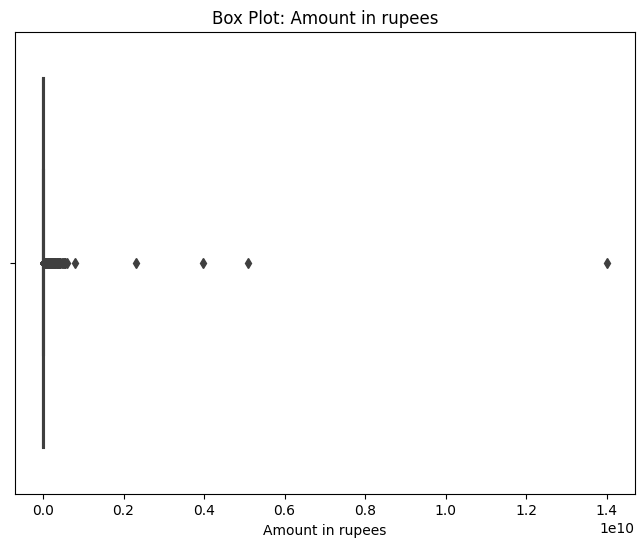

In [51]:
# Box Plot for 'Amount_in_rupees'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Amount_in_rupees', data=df3)
plt.title("Box Plot: Amount in rupees")
plt.xlabel("Amount in rupees")
plt.show()

This code iterates through specified numeric columns, prints summary statistics for each, and then generates and displays a histogram to visualize its distribution.

Summary statistics for column Amount_in_rupees
count    1.875310e+05
mean     1.198134e+07
std      3.840648e+07
min      1.000000e+05
25%      5.000000e+06
50%      8.200000e+06
75%      1.360000e+07
max      1.400300e+10
Name: Amount_in_rupees, dtype: float64


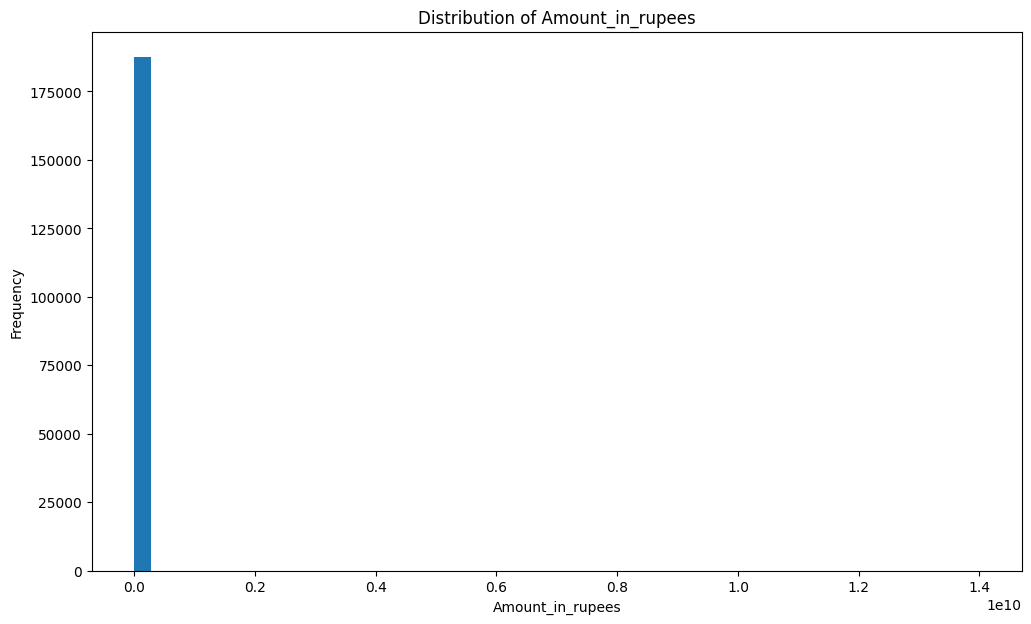

Summary statistics for column Price_in_rupees
count    1.875310e+05
mean     7.583772e+03
std      2.592692e+04
min      0.000000e+00
25%      4.501500e+03
50%      6.499000e+03
75%      8.452500e+03
max      6.700000e+06
Name: Price_in_rupees, dtype: float64


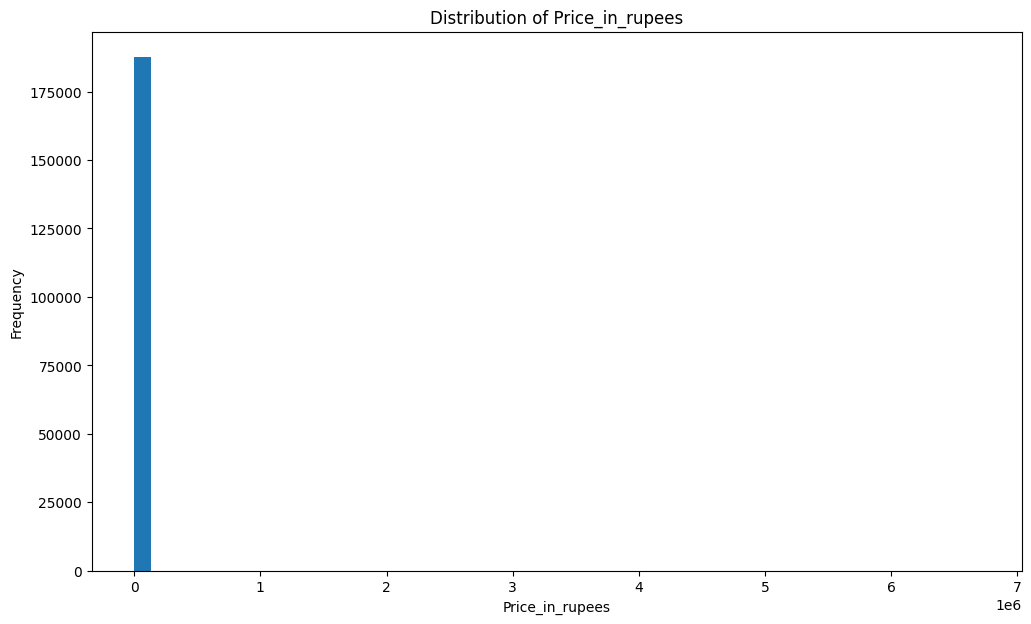

Summary statistics for column Carpet_Area_in_sqft
count    187531.000000
mean       1267.967442
std        2301.537433
min           1.000000
25%        1000.000000
50%        1267.967442
75%        1267.967442
max      709222.000000
Name: Carpet_Area_in_sqft, dtype: float64


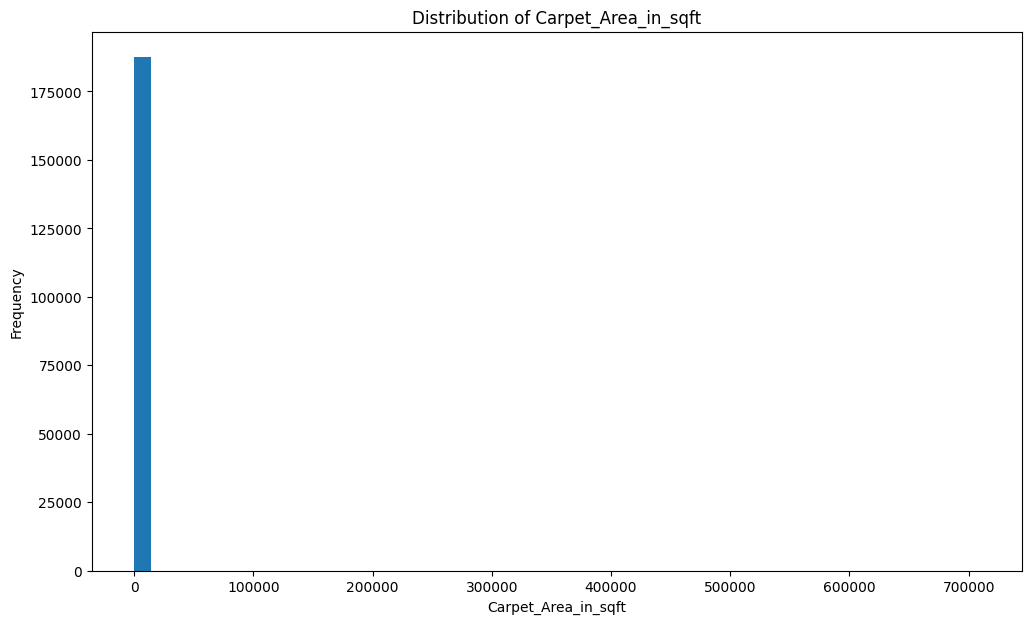

Summary statistics for column Bathroom
count    187531.000000
mean          2.428060
std           0.867447
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          10.000000
Name: Bathroom, dtype: float64


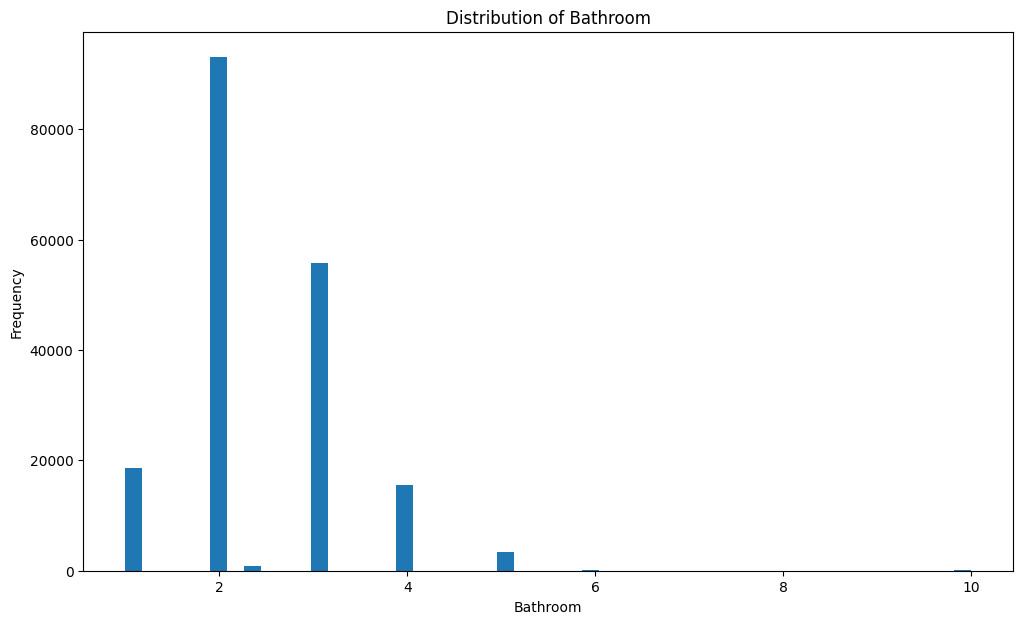

In [52]:
numeric_columns = ['Amount_in_rupees', 'Price_in_rupees', 'Carpet_Area_in_sqft', 'Bathroom',]
for columns in numeric_columns:
    print("Summary statistics for column", columns)
    print(df3[columns].describe())
    plt.figure(figsize=(12, 7))
    plt.hist(df3[columns], bins=50)
    plt.title(f"Distribution of {columns}")
    plt.xlabel(columns)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
This code iterates through specified categorical columns, displays the unique values and their counts, and then generates and plots a bar chart to visualize the distribution of each category.

Unique values in column Transaction
Transaction
Resale          144255
New Property     42565
Other              709
Rent/Lease           2
Name: count, dtype: int64


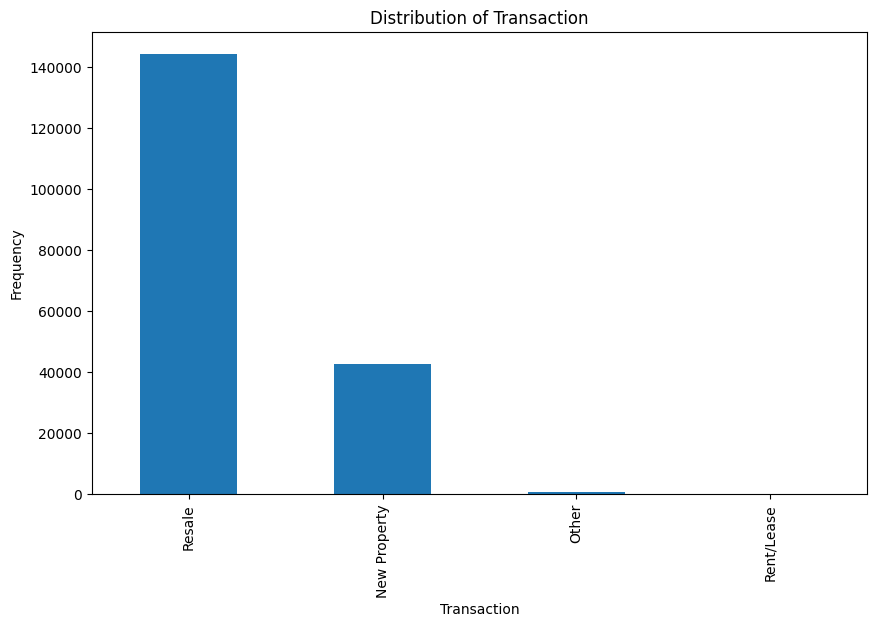

Unique values in column Furnishing
Furnishing
Semi-Furnished    91215
Unfurnished       76154
Furnished         20162
Name: count, dtype: int64


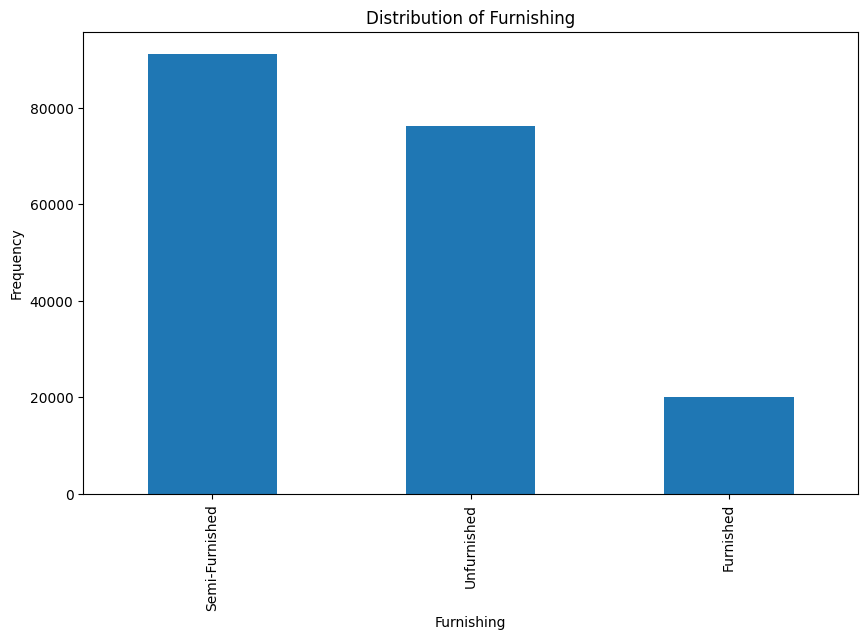

Unique values in column facing
facing
Unknown         70233
East            54741
North - East    24220
North           16533
West             8574
South            4694
North - West     3843
South - East     2622
South -West      2071
Name: count, dtype: int64


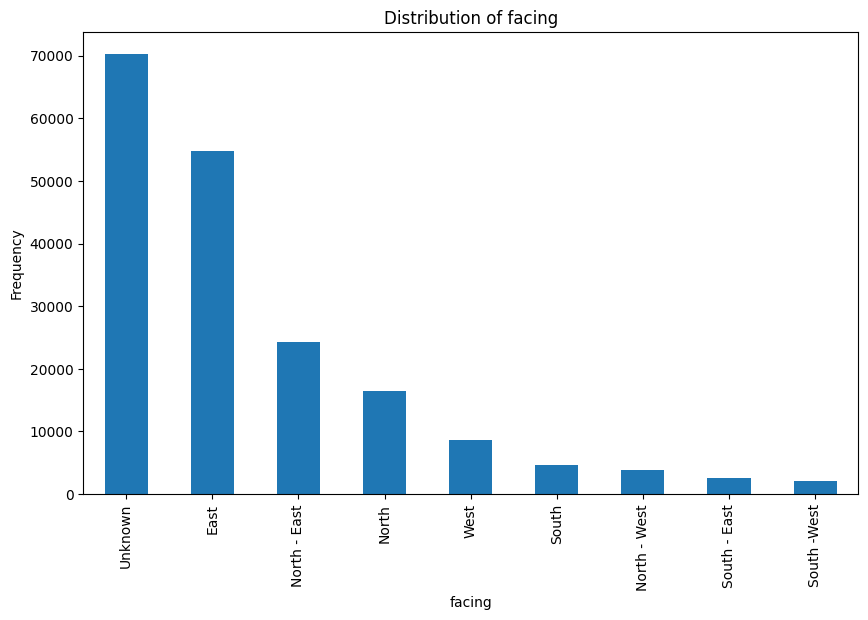

Unique values in column overlooking
overlooking
Unknown                                        81436
Main Road                                      32193
Garden/Park, Main Road                         27238
Garden/Park                                    23077
Garden/Park, Pool, Main Road                   12413
Pool, Garden/Park, Main Road                    3615
Garden/Park, Pool                               2880
Main Road, Garden/Park, Pool                    1359
Pool, Main Road                                 1136
Pool                                            1012
Main Road, Garden/Park                           666
Pool, Garden/Park                                435
Garden/Park, Main Road, Pool                      39
Main Road, Pool                                   11
Main Road, Pool, Garden/Park                       8
Pool, Main Road, Garden/Park                       6
Main Road, Not Available                           4
Garden/Park, Pool, Main Road, Not Available        

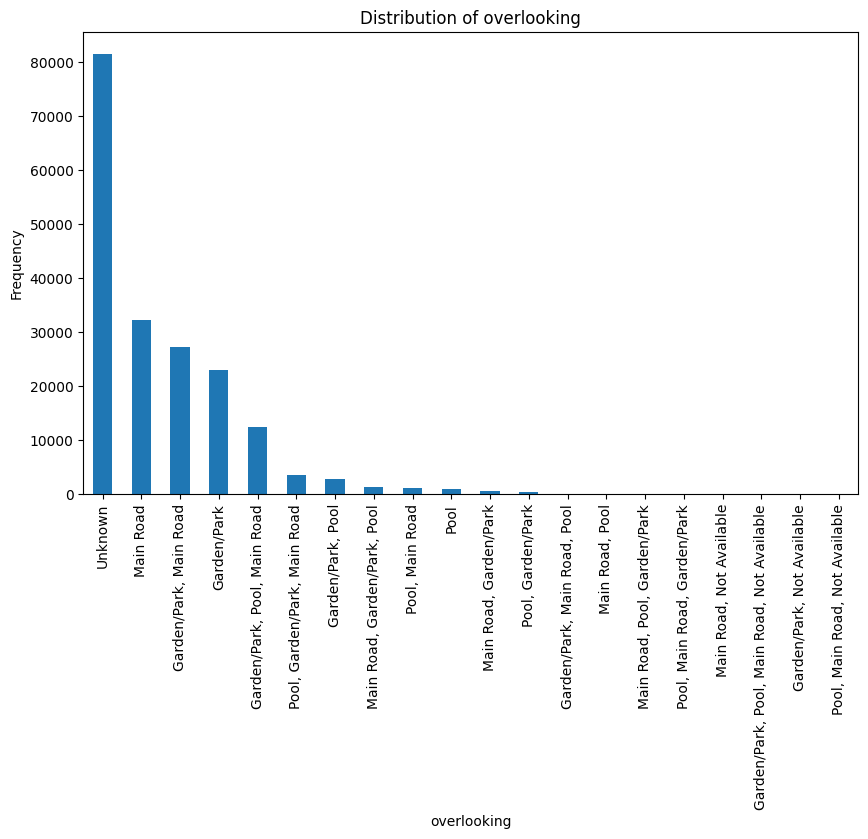

Unique values in column Ownership
Ownership
Freehold                112229
Unknown                  65517
Leasehold                 5285
Co-operative Society      3431
Power Of Attorney         1069
Name: count, dtype: int64


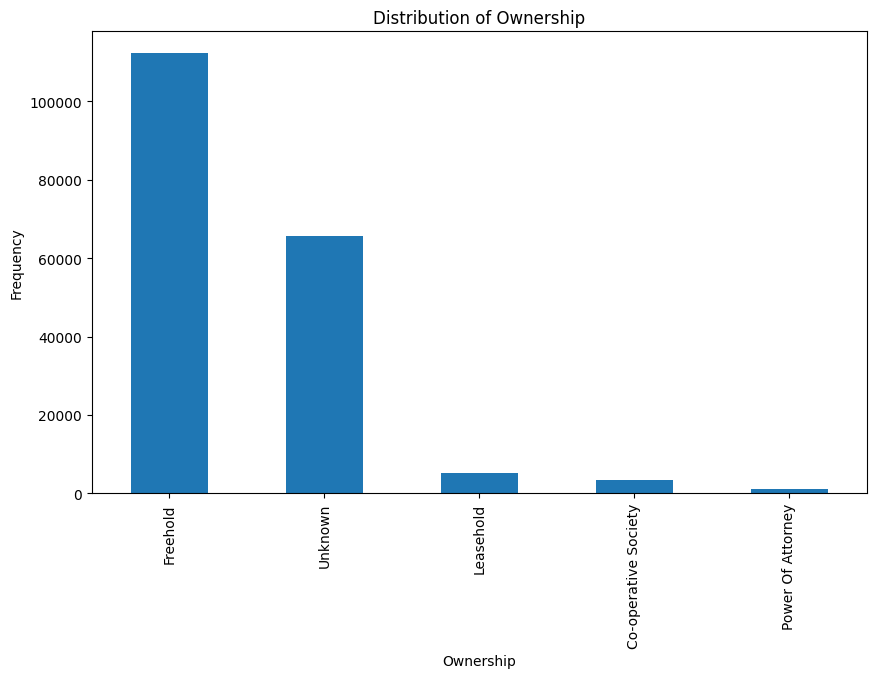

In [53]:
categorical_columns = ['Transaction', 'Furnishing', 'facing', 'overlooking', 'Ownership']
for columns in categorical_columns:
    print("Unique values in column", columns)
    print(df3[columns].value_counts())
    plt.figure(figsize=(10, 6))
    df3[columns].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {columns}")
    plt.xlabel(columns)
    plt.ylabel("Frequency")
    plt.show()

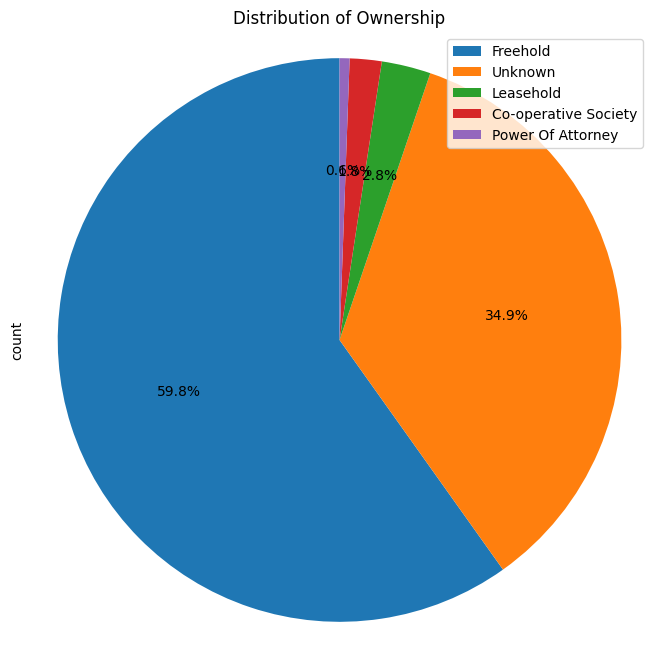

In [54]:
 #Let's plot a pie chart for the 'Ownership' column
plt.figure(figsize=(8, 8))
df3['Ownership'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=None, startangle=90)
plt.axis('equal')
plt.legend(labels=df3['Ownership'].value_counts().index, loc='best')
plt.title("Distribution of Ownership")
plt.show()

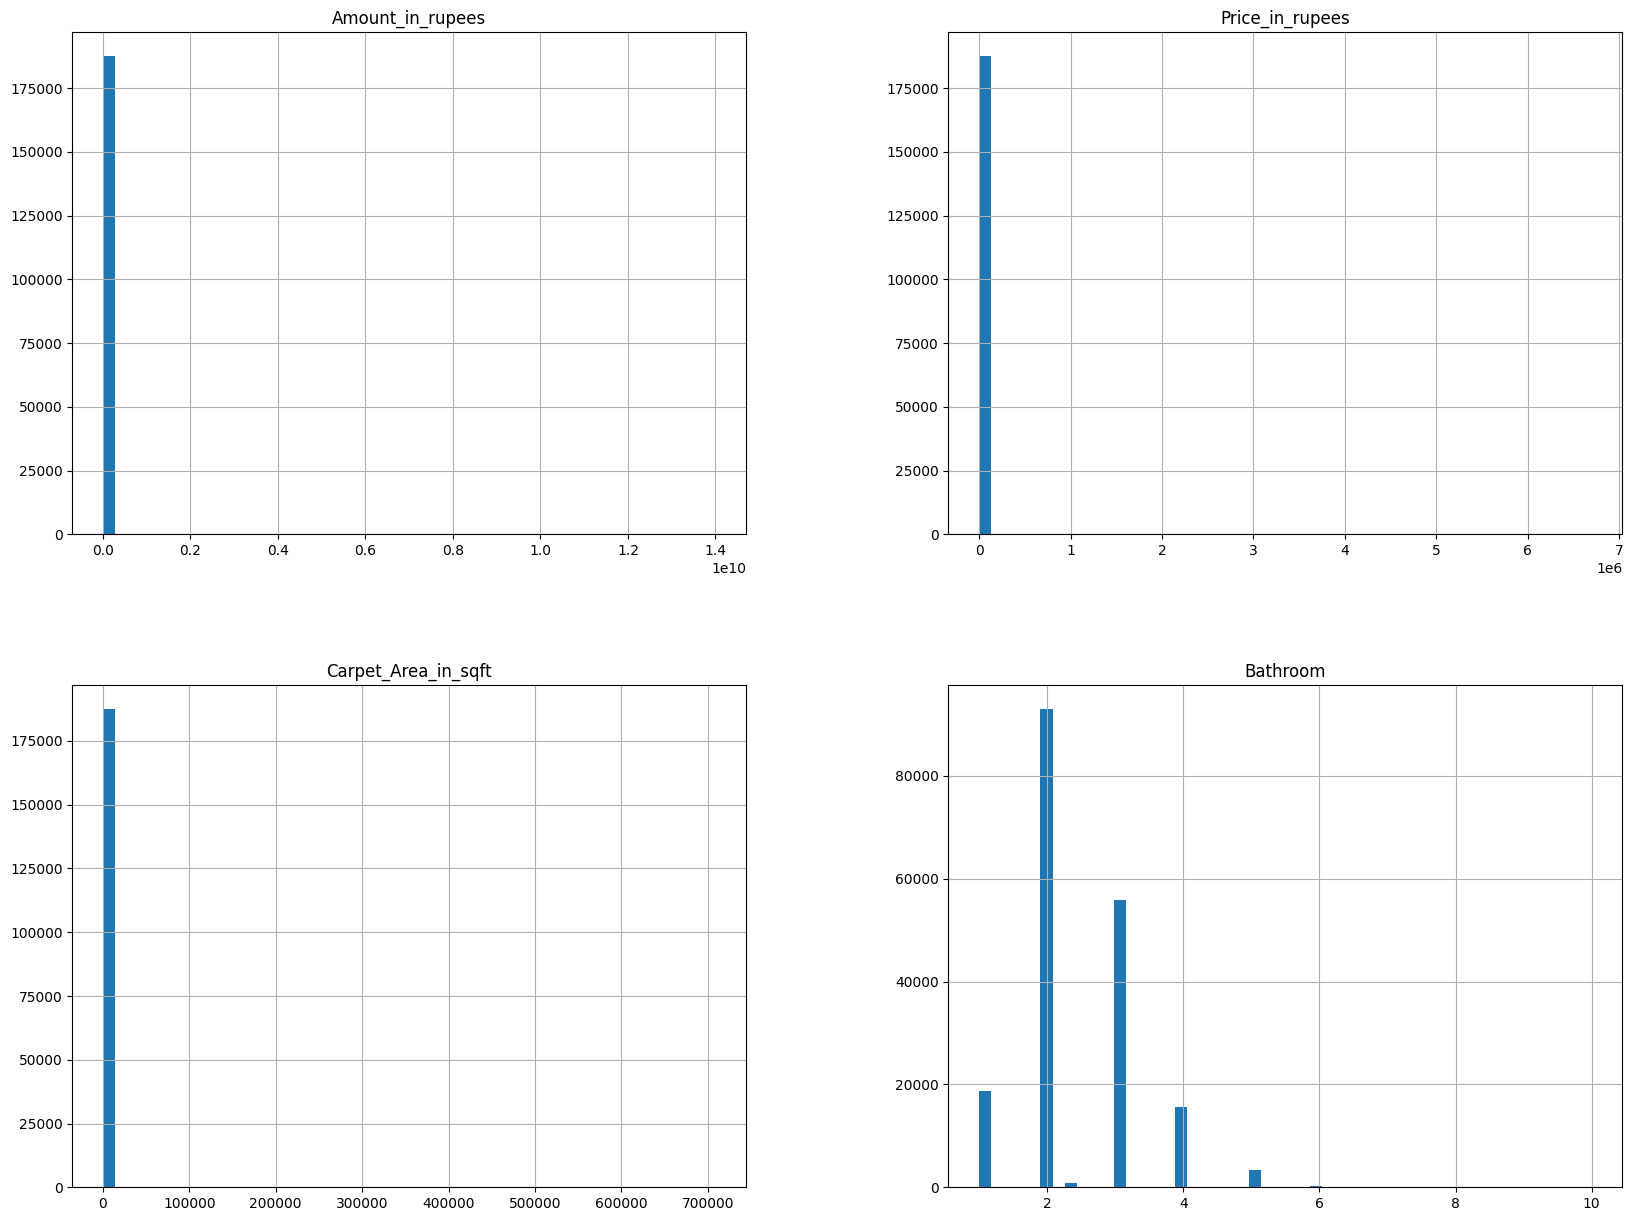

In [55]:
df3.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
This code generates a scatter plot matrix for the specified numerical attributes in the DataFrame, displaying pairwise relationships and individual distributions.

array([[<Axes: xlabel='Amount_in_rupees', ylabel='Amount_in_rupees'>,
        <Axes: xlabel='Price_in_rupees', ylabel='Amount_in_rupees'>,
        <Axes: xlabel='Bathroom', ylabel='Amount_in_rupees'>,
        <Axes: xlabel='Carpet_Area_in_sqft', ylabel='Amount_in_rupees'>],
       [<Axes: xlabel='Amount_in_rupees', ylabel='Price_in_rupees'>,
        <Axes: xlabel='Price_in_rupees', ylabel='Price_in_rupees'>,
        <Axes: xlabel='Bathroom', ylabel='Price_in_rupees'>,
        <Axes: xlabel='Carpet_Area_in_sqft', ylabel='Price_in_rupees'>],
       [<Axes: xlabel='Amount_in_rupees', ylabel='Bathroom'>,
        <Axes: xlabel='Price_in_rupees', ylabel='Bathroom'>,
        <Axes: xlabel='Bathroom', ylabel='Bathroom'>,
        <Axes: xlabel='Carpet_Area_in_sqft', ylabel='Bathroom'>],
       [<Axes: xlabel='Amount_in_rupees', ylabel='Carpet_Area_in_sqft'>,
        <Axes: xlabel='Price_in_rupees', ylabel='Carpet_Area_in_sqft'>,
        <Axes: xlabel='Bathroom', ylabel='Carpet_Area_in_sqft'>,
 

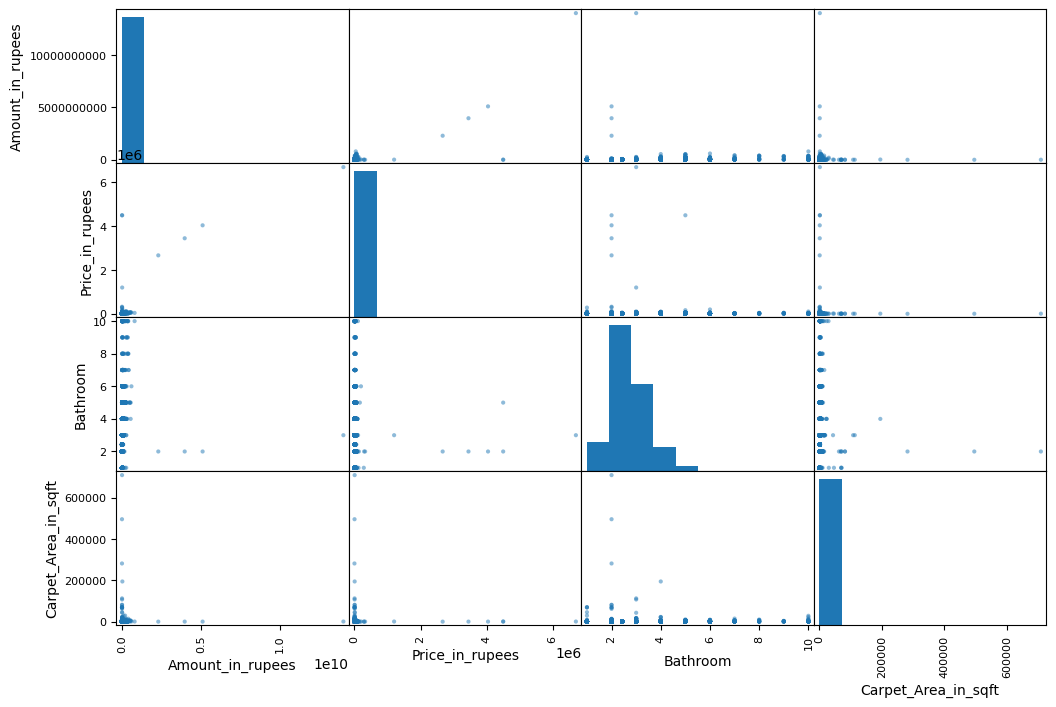

In [61]:
from pandas.plotting import scatter_matrix
attributes = ["Amount_in_rupees", "Price_in_rupees", "Bathroom",
 "Carpet_Area_in_sqft"]
scatter_matrix(df3[attributes], figsize=(12, 8))

In [66]:
df4 = df3.copy()

In [63]:
dummies = pd.get_dummies(df4.location,dummy_na=False,dtype=int)
dummies.head(3)

,agra,ahmadnagar,ahmedabad,allahabad,aurangabad,badlapur,bangalore,belgaum,bhiwadi,bhiwandi,...,trivandrum,udaipur,udupi,vadodara,vapi,varanasi,vijayawada,visakhapatnam,vrindavan,zirakpur
Index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This code concatenates two DataFrames, df4 and dummies, column-wise into df5, and then displays the last few rows of the resulting DataFrame.

In [64]:
df5 = pd.concat([df4,dummies],axis='columns'  )
df5.tail()

,Amount_in_rupees,Price_in_rupees,location,Carpet_Area_in_sqft,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,...,trivandrum,udaipur,udupi,vadodara,vapi,varanasi,vijayawada,visakhapatnam,vrindavan,zirakpur
Index,,,,,,,,,,,,,,,,,,,,,
187526,6300000.0,3225.0,zirakpur,1267.967442,2 out of 4,New Property,Semi-Furnished,East,Garden/Park,3.0,...,0,0,0,0,0,0,0,0,0,1
187527,5500000.0,3274.0,zirakpur,1267.967442,4 out of 6,Resale,Unfurnished,North - East,"Garden/Park, Main Road",3.0,...,0,0,0,0,0,0,0,0,0,1
187528,7600000.0,4343.0,zirakpur,1250.000000,1 out of 3,Resale,Furnished,East,"Garden/Park, Main Road",3.0,...,0,0,0,0,0,0,0,0,0,1
187529,3000000.0,4231.0,zirakpur,1267.967442,2 out of 2,Resale,Semi-Furnished,Unknown,Main Road,2.0,...,0,0,0,0,0,0,0,0,0,1
187530,11800000.0,6162.0,zirakpur,1267.967442,5 out of 13,Resale,Semi-Furnished,North - East,"Garden/Park, Pool",4.0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
df5.shape

(187531, 92)

In [68]:
df6=df5.drop('location',axis='columns')
df6.head()

,Amount_in_rupees,Price_in_rupees,Carpet_Area_in_sqft,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Ownership,...,trivandrum,udaipur,udupi,vadodara,vapi,varanasi,vijayawada,visakhapatnam,vrindavan,zirakpur
Index,,,,,,,,,,,,,,,,,,,,,
0,4200000.0,6000.000000,500.0,10 out of 11,Resale,Unfurnished,Unknown,Unknown,1.0,Unknown,...,0,0,0,0,0,0,0,0,0,0
1,9800000.0,13799.000000,473.0,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2.0,Freehold,...,0,0,0,0,0,0,0,0,0,0
2,14000000.0,17500.000000,779.0,10 out of 29,Resale,Unfurnished,East,Garden/Park,2.0,Freehold,...,0,0,0,0,0,0,0,0,0,0
3,2500000.0,7583.771885,530.0,1 out of 3,Resale,Unfurnished,Unknown,Unknown,1.0,Unknown,...,0,0,0,0,0,0,0,0,0,0
4,16000000.0,18824.000000,635.0,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2.0,Co-operative Society,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187531 entries, 0 to 187530
Data columns (total 91 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Amount_in_rupees     187531 non-null  float64
 1   Price_in_rupees      187531 non-null  float64
 2   Carpet_Area_in_sqft  187531 non-null  float64
 3   Floor                187531 non-null  object 
 4   Transaction          187531 non-null  object 
 5   Furnishing           187531 non-null  object 
 6   facing               187531 non-null  object 
 7   overlooking          187531 non-null  object 
 8   Bathroom             187531 non-null  float64
 9   Ownership            187531 non-null  object 
 10  agra                 187531 non-null  int64  
 11  ahmadnagar           187531 non-null  int64  
 12  ahmedabad            187531 non-null  int64  
 13  allahabad            187531 non-null  int64  
 14  aurangabad           187531 non-null  int64  
 15  badlapur             1

This code defines and applies a function to perform Label Encoding on a list of specified categorical columns within a DataFrame.

In [70]:
from sklearn.preprocessing import LabelEncoder
# Function to perform Label Encoding for multiple columns
def label_encode_multiple(df6, columns):
    le = LabelEncoder()
    for column in columns:
        df6[column] = le.fit_transform(df6[column])
    return df6

label_encode_columns = ['Transaction','Floor', 'Furnishing', 'facing', 'overlooking', 'Ownership']
df8 = label_encode_multiple(df6, label_encode_columns)

In [71]:
from sklearn.preprocessing import StandardScaler
# Standardization
fc = StandardScaler()
df8_standardized = fc.fit_transform(df8)
df = pd.DataFrame(df8_standardized, columns=df8.columns)

In [72]:
X = df.drop(columns=['Amount_in_rupees'])
y = df['Amount_in_rupees']

In [74]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 96.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 85.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]m1/2 [xgboost]


This comprehensive code block sets up, trains, and evaluates various regression models, including linear and polynomial regression, on a dataset, then calculates and stores their performance metrics.

Linear Regression:
R-squared: 0.94
Mean Absolute Error (MAE): 8.69
Root Mean Squared Error (RMSE): 10.17
Accuracy of Model:0.94
****************************************
Polynomial Regression (degree=2):
R-squared: 0.94
Mean Absolute Error (MAE): 8.72
Root Mean Squared Error (RMSE): 10.18
Accuracy of Model:0.94
****************************************
Decision Tree Regressor:
R-squared: 0.87
Mean Absolute Error (MAE): 12.76
Root Mean Squared Error (RMSE): 14.91
Accuracy of Model:0.87
****************************************
Random Forest:
R-squared: 0.92
Mean Absolute Error (MAE): 9.85
Root Mean Squared Error (RMSE): 11.60
Accuracy of Model:0.92
****************************************
Gradient Boosting:
R-squared: 0.90
Mean Absolute Error (MAE): 11.07
Root Mean Squared Error (RMSE): 13.07
Accuracy of Model:0.90
****************************************
XGBRegressor:
R-squared: 0.89
Mean Absolute Error (MAE): 11.43
Root Mean Squared Error (RMSE): 13.85
Accuracy of Model:0.89
************

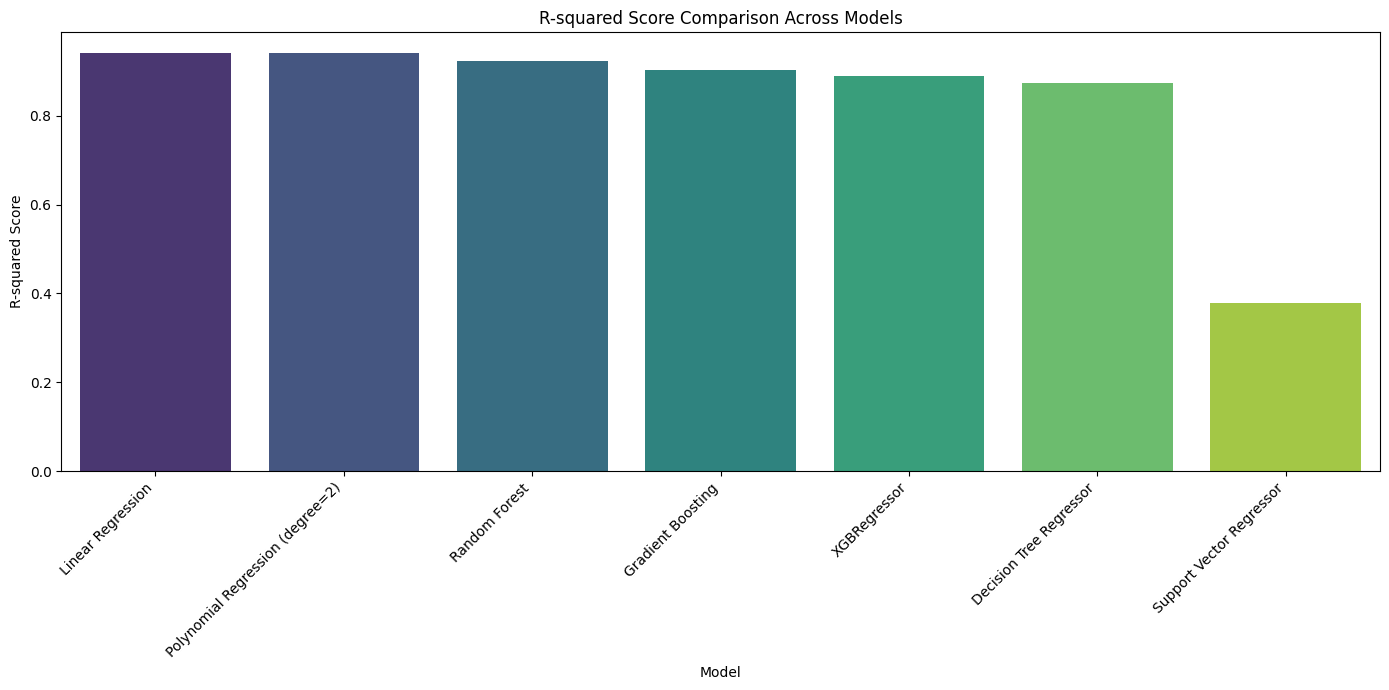

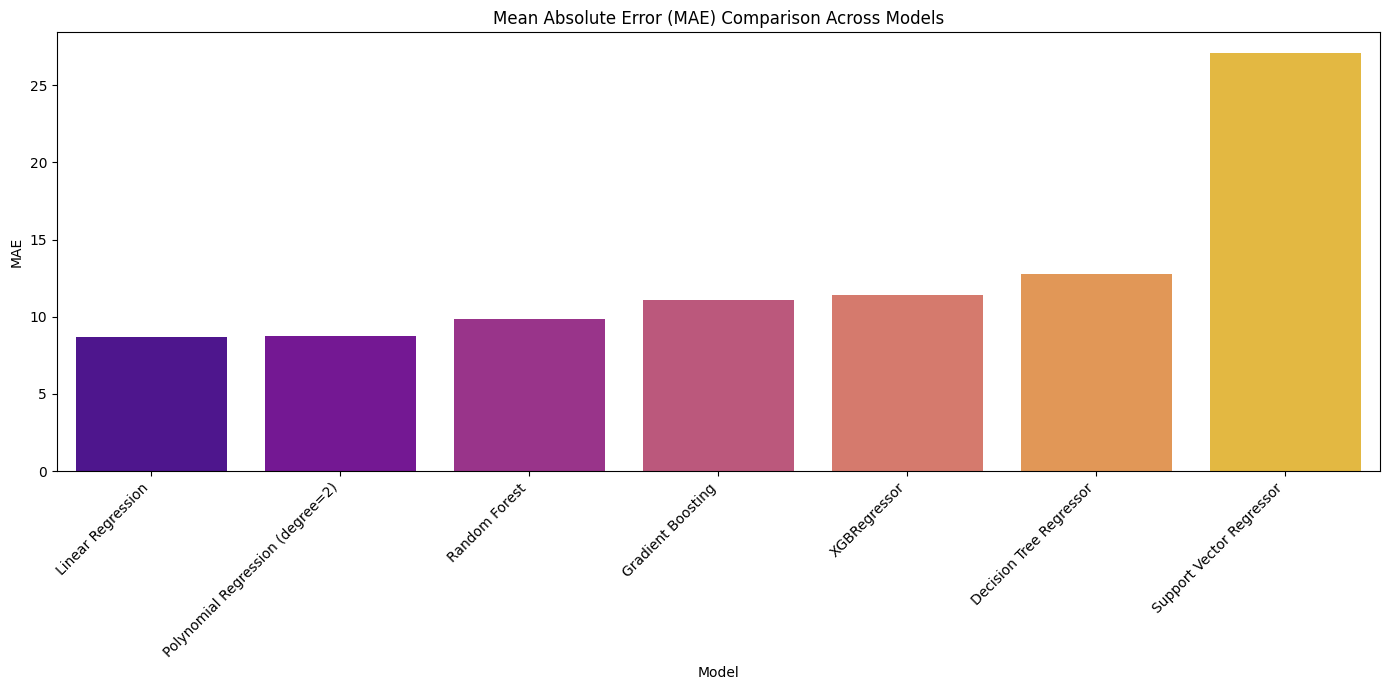

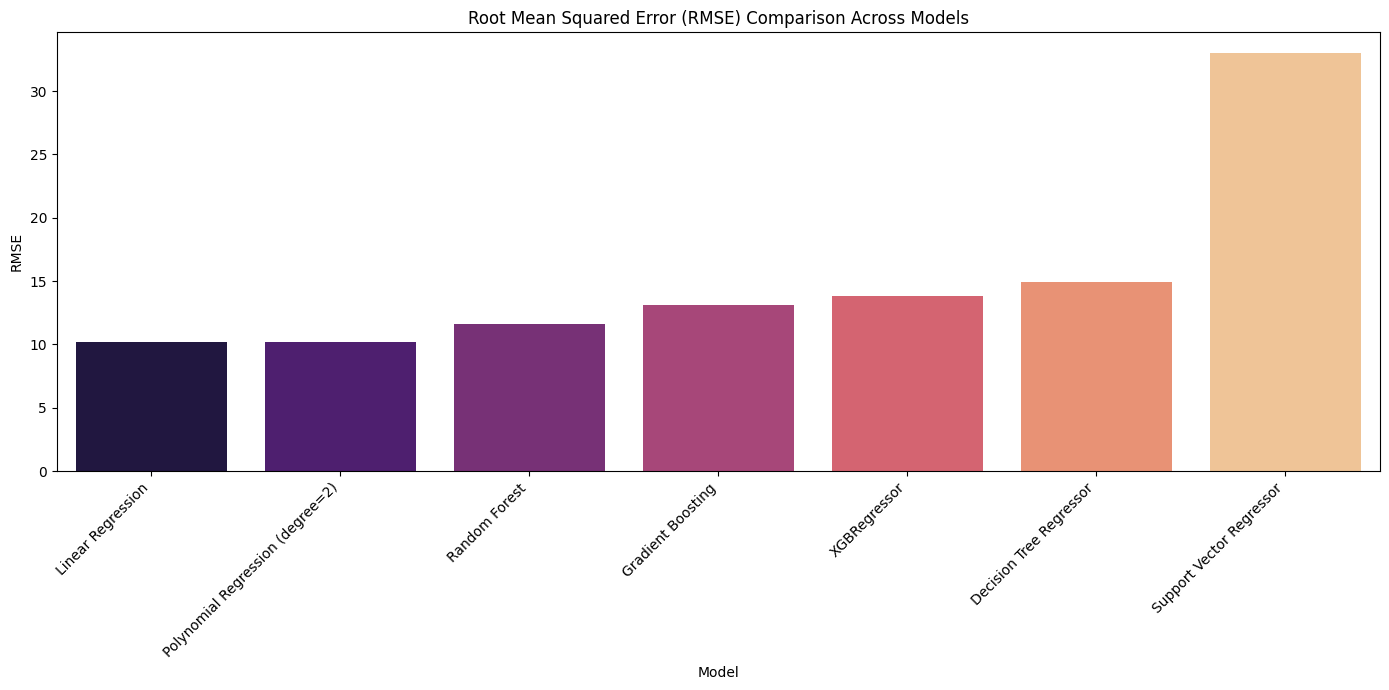

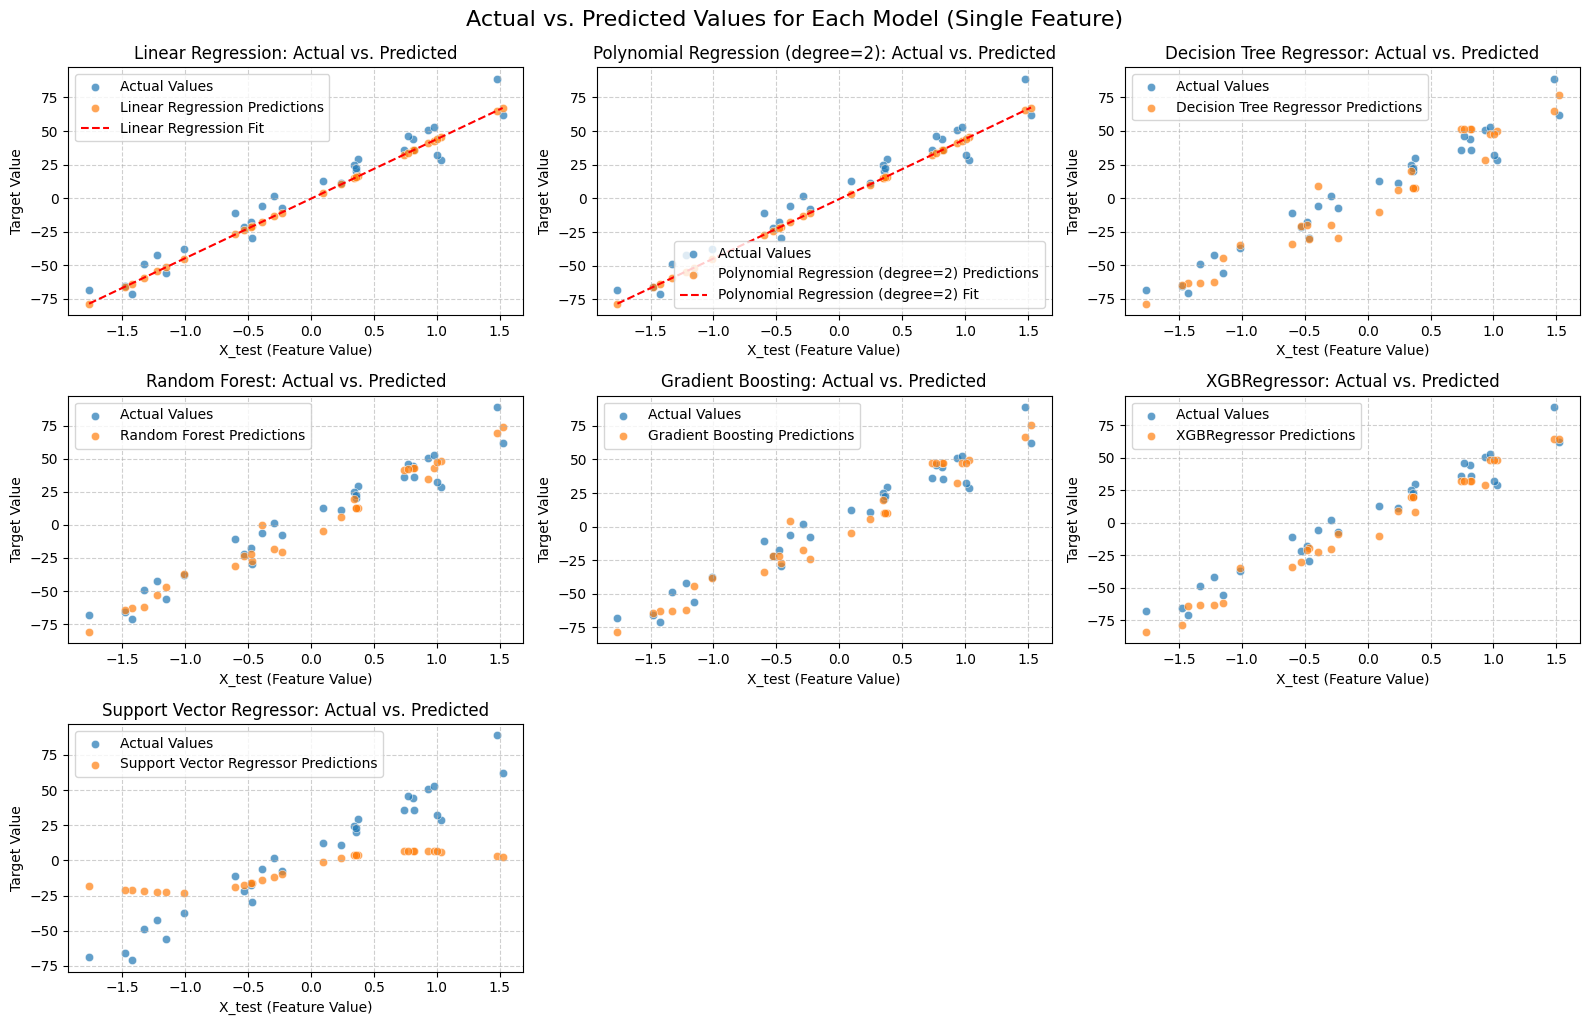

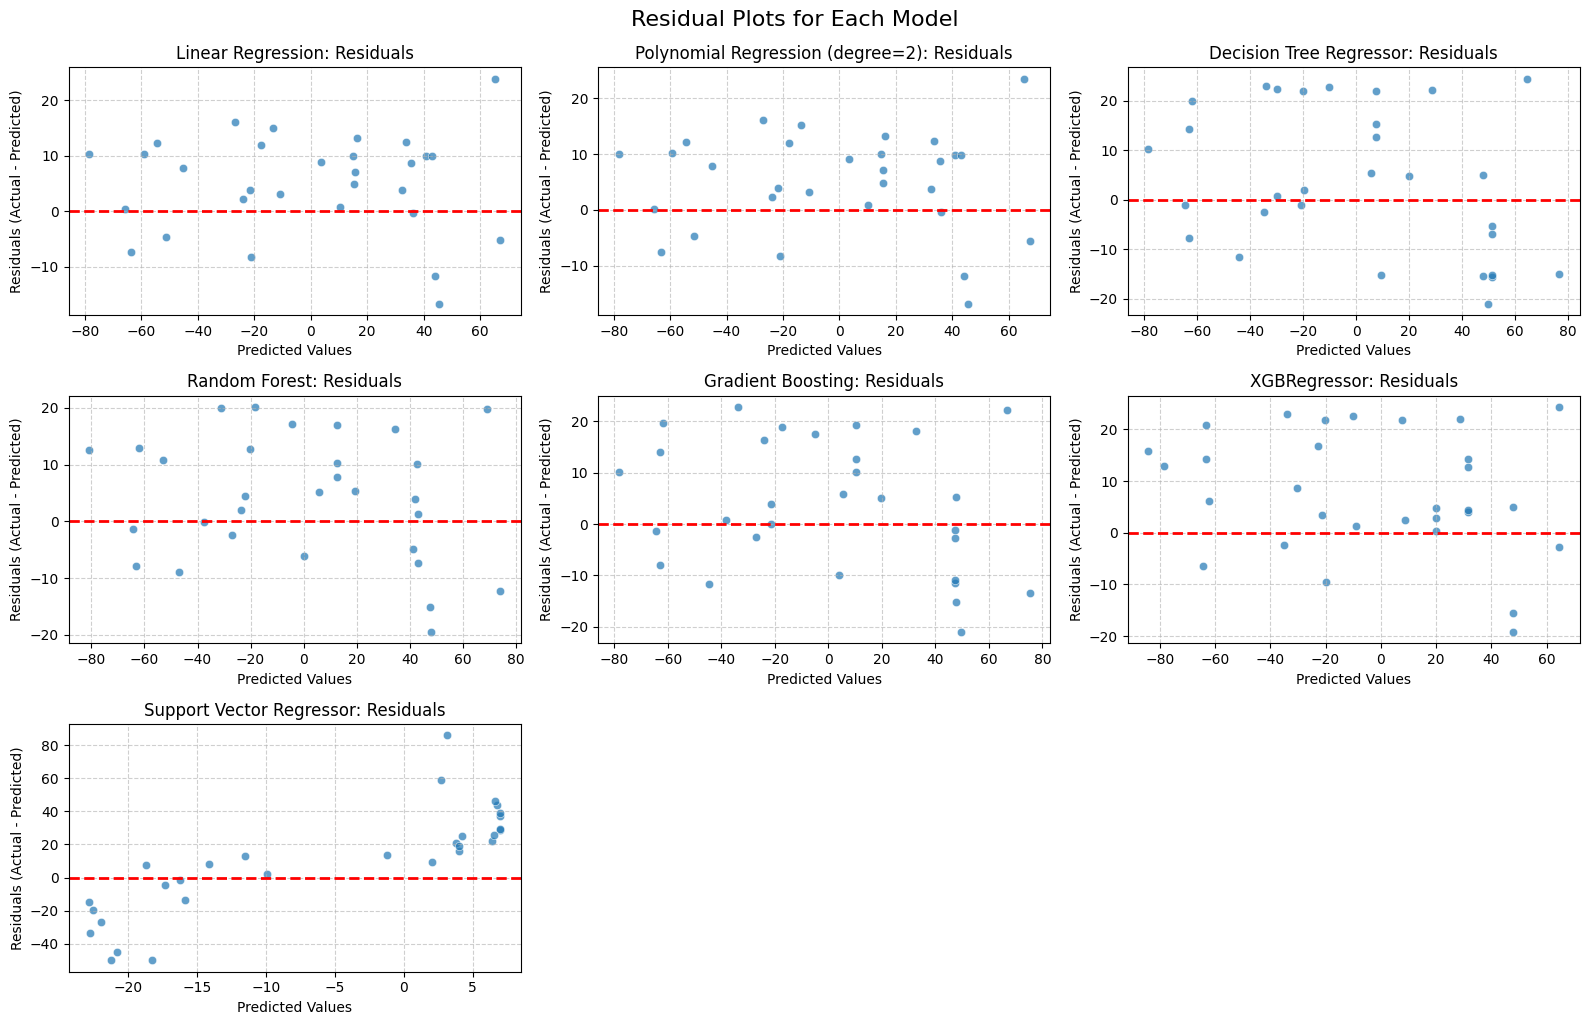

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# --- Data Preparation (using dummy data for demonstration if X and y aren't defined) ---
if 'X' not in locals() and 'y' not in locals():
    print("X and y not found, creating dummy data for demonstration.")
    from sklearn.datasets import make_regression
    X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
    # If X has only one feature, reshape it for consistent plotting
    if X.ndim == 1:
        X = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# --- Model Training and Evaluation (as per your previous request) ---
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (degree=2)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42), # Added random_state for reproducibility
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42), # Added random_state for reproducibility
    'Support Vector Regressor': SVR()
}

results = [] # To store metrics for plotting
predictions = {} # To store predictions for plotting

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    scoree = model.score(X_test,y_test)

    results.append({
        'Model': model_name,
        'R2 Score': r2,
        'MAE': mae,
        'RMSE': rmse,
        'Accuracy Score': scoree
    })
    predictions[model_name] = y_pred

    print(f'{model_name}:')
    print(f'R-squared: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'Accuracy of Model:{scoree:.2f}')
    print('****************************************')

results_df = pd.DataFrame(results)

# --- Visualizations ---

# 1. Bar Plot of Performance Metrics
plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='R2 Score', data=results_df.sort_values(by='R2 Score', ascending=False), palette='viridis')
plt.title('R-squared Score Comparison Across Models')
plt.ylabel('R-squared Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='MAE', data=results_df.sort_values(by='MAE'), palette='plasma')
plt.title('Mean Absolute Error (MAE) Comparison Across Models')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='RMSE', data=results_df.sort_values(by='RMSE'), palette='magma')
plt.title('Root Mean Squared Error (RMSE) Comparison Across Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Actual vs. Predicted Values Plots (for single feature X, if applicable)
# This plot is most effective when X has a single feature for easy visualization.
# If X has multiple features, consider plotting actual vs. predicted for a few models,
# or focus on residual plots.

if X_test.shape[1] == 1: # Check if X has only one feature
    plt.figure(figsize=(16, 10))
    for i, (model_name, y_pred) in enumerate(predictions.items()):
        plt.subplot(3, np.ceil(len(models)/3).astype(int), i + 1) # Adjust subplot grid based on number of models
        sns.scatterplot(x=X_test.flatten(), y=y_test, label='Actual Values', alpha=0.7)
        sns.scatterplot(x=X_test.flatten(), y=y_pred, label=f'{model_name} Predictions', alpha=0.7)
        # If possible, plot the regression line for better visualization for simple models
        if model_name in ['Linear Regression', 'Polynomial Regression (degree=2)']:
            # Sort X_test to draw a continuous line for polynomial regression
            sorted_idx = X_test.flatten().argsort()
            plt.plot(X_test.flatten()[sorted_idx], y_pred[sorted_idx], color='red', linestyle='--', label=f'{model_name} Fit')
        plt.title(f'{model_name}: Actual vs. Predicted')
        plt.xlabel('X_test (Feature Value)')
        plt.ylabel('Target Value')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.suptitle('Actual vs. Predicted Values for Each Model (Single Feature)', y=1.02, fontsize=16)
    plt.show()

# 3. Residual Plots (Actual - Predicted)
plt.figure(figsize=(16, 10))
for i, (model_name, y_pred) in enumerate(predictions.items()):
    residuals = y_test - y_pred
    plt.subplot(3, np.ceil(len(models)/3).astype(int), i + 1)
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.title(f'{model_name}: Residuals')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
plt.suptitle('Residual Plots for Each Model', y=1.02, fontsize=16)
plt.show()